In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
import seaborn as sns

In [2]:
data = pd.read_csv('Salaries.csv')

In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data[(data['rank'] == 'AsstProf') & (data['yrs.service'] < 5)].shape[0] / data.shape[0]

0.15869017632241814

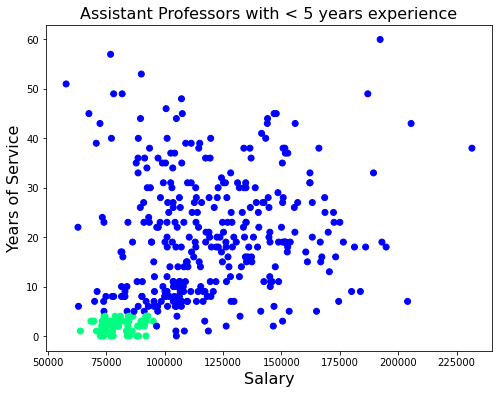

In [349]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(data['salary'], data['yrs.service'], 
            c=(data['rank'] == 'AsstProf') & (data['yrs.service'] < 5), cmap='winter')
plt.xlabel(r'Salary', fontsize=16)
plt.ylabel(r'Years of Service', fontsize=16)
plt.title('Assistant Professors with < 5 years experience', fontsize=16)
plt.savefig('1.png', bbox_inches='tight', format='png', dpi=300)
plt.show()


In [5]:
female_data = data[data['sex']=='Female']
male_data = data[data['sex']=='Male']

female_salary = female_data['salary']
male_salary = male_data['salary']

print(female_salary.mean(), female_salary.std())
print(male_salary.mean(), male_salary.std())

t, p = scipy.stats.ttest_ind(female_salary, male_salary)
print(t, p)

t, p = scipy.stats.ttest_ind(female_data[female_data['rank'] == 'AsstProf']['salary'], 
                             male_data[male_data['rank'] == 'AsstProf']['salary'])
print(t, p)

t, p = scipy.stats.ttest_ind(female_data[female_data['rank'] == 'AssocProf']['salary'], 
                             male_data[male_data['rank'] == 'AssocProf']['salary'])
print(t, p)

t, p = scipy.stats.ttest_ind(female_data[female_data['rank'] == 'Prof']['salary'], 
                             male_data[male_data['rank'] == 'Prof']['salary'])
print(t, p)

_, p = scipy.stats.fisher_exact([[female_data[female_data['rank'] == 'Prof'].shape[0], female_data[female_data['rank'] != 'Prof'].shape[0]],
                                [male_data[male_data['rank'] == 'Prof'].shape[0], male_data[male_data['rank'] != 'Prof'].shape[0]]])
print(p)

101002.41025641025 25952.127317446346
115090.41899441341 30436.92734352908
-2.781674064262432 0.005667106519338681
-1.2142048587920287 0.22906256825444055
-1.3434883936345594 0.18401063127831413
-0.7609946682607647 0.44733943200047255
0.006382159207531315


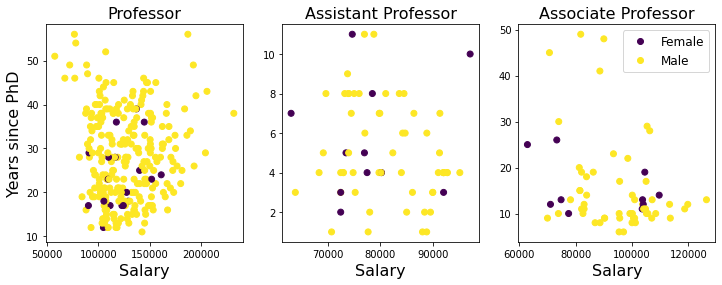

In [347]:
ranks = data['rank'].unique()
n_ranks = len(ranks)
fig, ax = plt.subplots(1, n_ranks, figsize=(12, 4))
colors = ['C0', 'C1']
for i in range(n_ranks):
    scatter = ax[i].scatter(data[data['rank']==ranks[i]]['salary'], data[data['rank']==ranks[i]]['yrs.since.phd'], c=(data[data['rank']==ranks[i]]['sex']=='Male'))

cmaps = (scatter.legend_elements()[0], ['Female', 'Male'],) 
legend = ax[2].legend(*cmaps, fontsize=12)
#Copied this code from later in the project. Required to create the legend for the colormap. 

ax[0].set_title('Professor', fontsize=16)
ax[1].set_title('Assistant Professor', fontsize=16)
ax[2].set_title('Associate Professor', fontsize=16)
ax[0].set_ylabel('Years since PhD', fontsize=16)
ax[0].set_xlabel('Salary', fontsize=16)
ax[1].set_xlabel('Salary', fontsize=16)
ax[2].set_xlabel('Salary', fontsize=16)



plt.savefig('2.png', bbox_inches='tight', format='png', dpi=300)
plt.show()


In [332]:
i

0

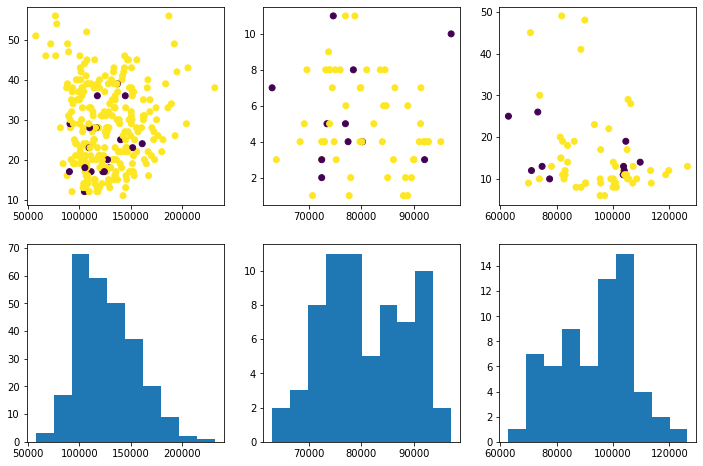

In [314]:
ranks = data['rank'].unique()
n_ranks = len(ranks)
fig, ax = plt.subplots(2, n_ranks, figsize=(12, 8))
colors = ['C0', 'C1']
for i in range(n_ranks):
    ax[1,i].hist(data[data['rank']==ranks[i]]['salary'])
    ax[0,i].scatter(data[data['rank']==ranks[i]]['salary'], data[data['rank']==ranks[i]]['yrs.since.phd'], c=(data[data['rank']==ranks[i]]['sex']=='Male'))
plt.savefig('2.png', bbox_inches='tight', format='png', dpi=300)
plt.show()


In [76]:
ranks

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

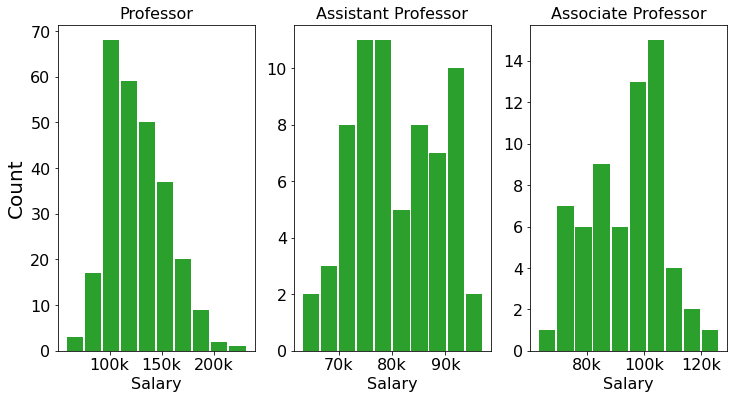

In [85]:
ranks = data['rank'].unique()
n_ranks = len(ranks)
fig, axes = plt.subplots(1, n_ranks, figsize=(12, 6))
for i in range(n_ranks):
    plt.subplot(1,n_ranks, i+1)
    plt.hist(data[data['rank']==ranks[i]]['salary'], rwidth=0.9, color='C2')
    plt.xlabel(r'Salary', fontsize=16)
    if i == 0:
        plt.ylabel(r'Count', fontsize=20)
        plt.xticks(ticks=[100000, 150000, 200000], labels=['100k', '150k', '200k'], fontsize=16)
        plt.title('Professor', fontsize=16)
    elif i == 1:
        plt.xticks(ticks=[70000, 80000, 90000], labels=['70k', '80k', '90k'], fontsize=16)
        plt.title('Assistant Professor', fontsize=16)
    elif i == 2: 
        plt.xticks(ticks=[80000, 100000, 120000], labels=['80k', '100k', '120k'], fontsize=16)
        plt.title('Associate Professor', fontsize=16)
    plt.yticks(fontsize=16)
        
    
plt.savefig('salary_by_rank.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [107]:
disciplines

array(['B', 'A'], dtype=object)

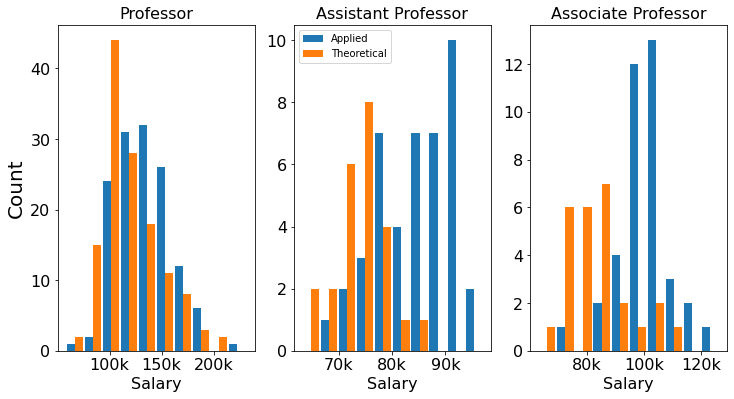

In [108]:
ranks = data['rank'].unique()
disciplines = data['discipline'].unique()
n_ranks = len(ranks)
fig, axes = plt.subplots(1, n_ranks, figsize=(12, 6))
for i in range(n_ranks):
    plt.subplot(1,n_ranks, i+1)

    plt.hist([data[(data['rank']==ranks[i]) & (data['discipline']==disciplines[0])]['salary'],
             data[(data['rank']==ranks[i]) & (data['discipline']==disciplines[1])]['salary']], 
             rwidth=0.9, color=['C0', 'C1'])
    plt.xlabel(r'Salary', fontsize=16)
    if i == 0:
        plt.ylabel(r'Count', fontsize=20)
        plt.xticks(ticks=[100000, 150000, 200000], labels=['100k', '150k', '200k'], fontsize=16)
        plt.title('Professor', fontsize=16)
        
    elif i == 1:
        plt.xticks(ticks=[70000, 80000, 90000], labels=['70k', '80k', '90k'], fontsize=16)
        plt.title('Assistant Professor', fontsize=16)
        plt.legend(['Applied', 'Theoretical'])
    elif i == 2: 
        plt.xticks(ticks=[80000, 100000, 120000], labels=['80k', '100k', '120k'], fontsize=16)
        plt.title('Associate Professor', fontsize=16)
    plt.yticks(fontsize=16)

    
plt.savefig('salary_by_rank.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

#Salary ranges are different for different ranks -> different subplots
#Salary ranges are similar for different disciplines -> same subplots

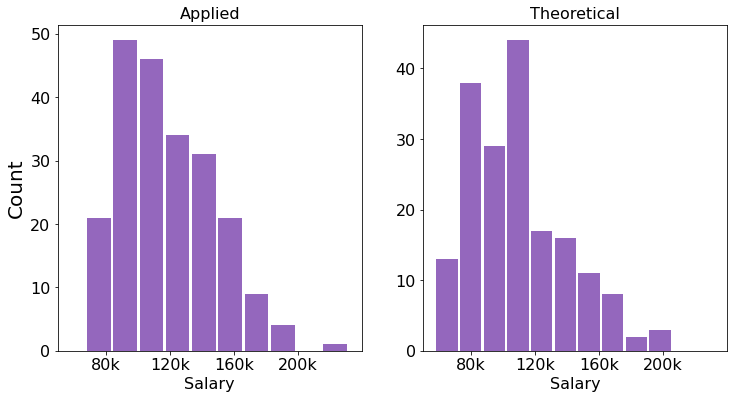

In [88]:
disciplines = data['discipline'].unique()
n_ranks = len(disciplines)
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
for i in range(n_ranks):
    plt.subplot(1,n_ranks, i+1)
    plt.hist(data[data['discipline']==disciplines[i]]['salary'], rwidth=0.9, color='C4')
    plt.xlim([5e4, 24e4])
    plt.xlabel(r'Salary', fontsize=16)
    if i == 0:
        plt.ylabel(r'Count', fontsize=20)
        plt.title('Applied', fontsize=16)
    elif i == 1: 
        plt.title('Theoretical', fontsize=16)
    plt.xticks(ticks=[80000, 120000, 160000, 200000], labels=['80k', '120k', '160k', '200k'], fontsize=16)
    plt.yticks(fontsize=16)
    
plt.savefig('salary_by_discipline.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [8]:
#data['discipline'] = data['discipline'] == 'B'
#data['sex'] = data['sex'] == 'Male'

model_data = pd.get_dummies(data, columns=['rank'], drop_first=False)
model_data['above_median'] = model_data['salary'] > model_data['salary'].median()
model_data = pd.get_dummies(model_data, columns=['discipline', 'sex', 'above_median'], drop_first=True)


model_data.head()

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_B,sex_Male,above_median_True
0,19,18,139750,0,0,1,1,1,1
1,20,16,173200,0,0,1,1,1,1
2,4,3,79750,0,1,0,1,1,0
3,45,39,115000,0,0,1,1,1,1
4,40,41,141500,0,0,1,1,1,1


In [385]:
X = model_data.drop(['salary', 'above_median_True'], axis=1)
y = model_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
cv = RepeatedKFold(n_splits = 5, n_repeats=3, random_state=20)




In [386]:
def RForest(max_features='auto', min_samples_split=2):
    model = RandomForestRegressor(max_features=max_features)
    return model


def cross_eval(model):
    n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    return n_scores

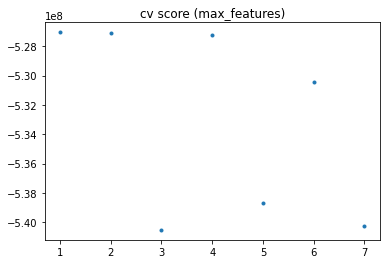

In [387]:
cv_score = []
for i in range(1, 8): 
    model = RForest(max_features=i)
    cv_score.append(np.mean(cross_eval(model)))

plt.plot(range(1, 8), cv_score, '.')
plt.title('cv score (max_features)')
plt.show()

#Consistently best in the range of 1-3 features, typically best at 1 feature

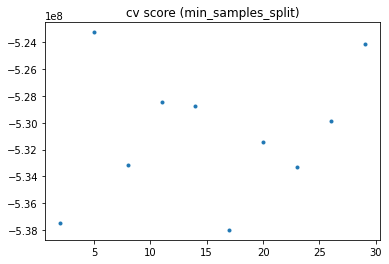

In [388]:
cv_score = []
for i in range(2, 30, 3): 
    model = RForest(max_features=1, min_samples_split=i)
    cv_score.append(np.mean(cross_eval(model)))

plt.plot(range(2, 30, 3), cv_score, '.')
plt.title('cv score (min_samples_split)')
plt.show()

#Minimal change as a function of min_samples_split 

In [389]:
model_1 = RForest(max_features=1)
model_1.fit(X_train, y_train)

RandomForestRegressor(max_features=1)

In [394]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(model_1.estimators_[10], out_file=None, feature_names = X_train.columns))
graph.format = 'png'
graph.render('show_tree', view=True)

'show_tree.png'

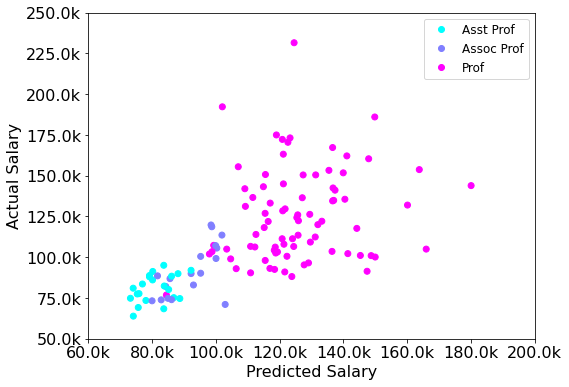

0.32538565656351326


In [370]:
fig, ax = plt.subplots(figsize=(8, 6))

rank = X_test['rank_Prof'].astype(np.int32) - X_test['rank_AsstProf'].astype(np.int32) + 1
scatter = ax.scatter(model_1.predict(X_test), y_test, 
            c=rank, cmap='cool')
cmaps = (scatter.legend_elements()[0], ['Asst Prof', 'Assoc Prof', 'Prof'],) 
legend = ax.legend(*cmaps, fontsize=12)

#Colormap returns 0 for AsstProf, 1 for AssocProf, and 2 for Prof
#Required a bit of hackery to behave as wanted. 


plt.xlabel(r'Predicted Salary', fontsize=16)
plt.ylabel(r'Actual Salary', fontsize=16)

plt.xticks(ticks=ax.get_xticks(), labels=[str(i/1000)+'k' for i in ax.get_xticks()], fontsize=16)
plt.yticks(ticks=ax.get_yticks(), labels=[str(i/1000)+'k' for i in ax.get_yticks()], fontsize=16)
plt.savefig('RForest_1.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

print(model_1.score(X_test, y_test))

In [403]:
X = model_data.drop(['salary'], axis=1)
y = model_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [404]:
model_1 = RForest(max_features=1)
model_1.fit(X_train, y_train)

RandomForestRegressor(max_features=1)

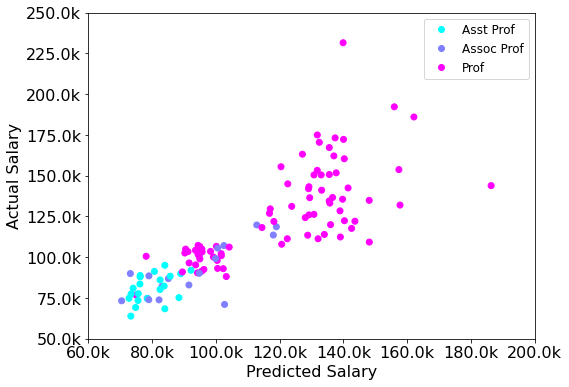

0.6603729411602668


In [405]:
fig, ax = plt.subplots(figsize=(8, 6))

rank = X_test['rank_Prof'].astype(np.int32) - X_test['rank_AsstProf'].astype(np.int32) + 1
scatter = ax.scatter(model_2.predict(X_test), y_test, 
            c=rank, cmap='cool')
cmaps = (scatter.legend_elements()[0], ['Asst Prof', 'Assoc Prof', 'Prof'],) 
legend = ax.legend(*cmaps, fontsize=12)

#Colormap returns -1 for AsstProf, 0 for AssocProf, and 1 for Prof
#Required a bit of hackery to behave as wanted. 


plt.xlabel(r'Predicted Salary', fontsize=16)
plt.ylabel(r'Actual Salary', fontsize=16)

plt.xticks(ticks=ax.get_xticks(), labels=[str(i/1000)+'k' for i in ax.get_xticks()], fontsize=16)
plt.yticks(ticks=ax.get_yticks(), labels=[str(i/1000)+'k' for i in ax.get_yticks()], fontsize=16)
plt.savefig('RForest_2.png', bbox_inches='tight', format='png', dpi=300)

plt.show()

print(model_1.score(X_test, y_test))

In [402]:
data['salary'].mean()

113706.45843828715

In [406]:
data['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [408]:
data[['sex', 'rank']].value_counts()

sex     rank     
Male    Prof         248
        AsstProf      56
        AssocProf     54
Female  Prof          18
        AsstProf      11
        AssocProf     10
dtype: int64

In [409]:
39 / (39 + 358)

0.0982367758186398